# Welcome to MSOMA Bootcamp 2019

Today is the first day of this year's MSOMA bootcamp.

## Introduction [Monicah]

1. What is the MSOMA bootcamp?
2. What should you expect to learn
3. Pre-Bootcamp Assignment
4. Facilitators

## Python Basics [Rosianah/Lewis]

### String Exercises

In [1]:
# 1 - Concatenation, Indexing, and Slicing

# Exercise 1
# Display the number of letters in the string
my_word = "antidisestablishmentarianism"

#Solution
print(len(my_word))


# Exercise 2
# Concatenate two strings together
string_left = "bat"
string_right = "man"

#Solution
print(string_left + string_right)


# Exercise 3
# Display two strings together, with a space in between
string_one = "heebie"
string_two = "jeebies"

#Solution
print(string_one, string_two)


# Exercise 3
# Display two strings together, with a space in between
string_one = "heebie"
string_two = "jeebies"

#Solution
print(string_one + " " + string_two)


# Exercise 4
# Use subscripting to display part of a string

#Solution
print("bazinga"[2:6])

28
batman
heebie jeebies
heebie jeebies
zing


## Exploratory Data Analysis

1. Handling outliers/anomalies
2. Handling missing values
3. Scale the data/Normalization
4. Visualize the data e.g. What variables are corelated with what variables. Helps in feature selection
5. Hypothesis testing

Outlier Detection


In [24]:
% %matplotlib inline
#Importations
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
import seaborn as sns



In [25]:
#Create a random dataset

np.random.seed(33454)
df = pd.DataFrame({'a': np.random.randint(1, 200, 20), 
                          'b': np.random.randint(1, 200, 20),
                          'c': np.random.randint(1, 200, 20)})

df [df > 150] *= 10
print (df)

       a     b     c
0      4  1970    79
1    109    50   124
2   1570    87    41
3    137    60  1990
4     19   138   100
5     86    83   143
6     55    23    58
7     78   145    18
8    132    39    65
9     37   146  1970
10  1640    55  1560
11    32  1540  1570
12   132  1950    44
13    67   148  1880
14    95  1730    52
15   124   102    21
16    93    61    56
17    84    21    25
18    21  1650  1630
19    34    52   126


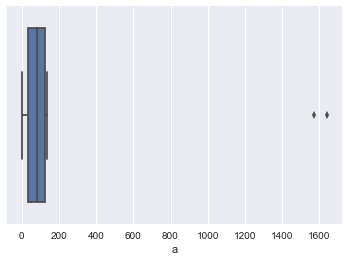

In [26]:
sns.boxplot(x=df['a'])

In [27]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

print (df)

      a    b     c
1   109   50   124
3   137   60  1990
4    19  138   100
5    86   83   143
6    55   23    58
7    78  145    18
8   132   39    65
9    37  146  1970
13   67  148  1880
15  124  102    21
16   93   61    56
17   84   21    25
19   34   52   126


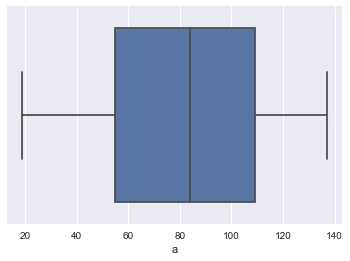

In [28]:
sns.boxplot(x=df['a'])

## Exercise: Remove outliers from the Boston housing prices dataset

In [29]:
#Starter Code

boston = load_boston()
x = boston.data
y = boston.target
columns = boston.feature_names

#create the dataframe
boston_df = pd.DataFrame(boston.data)
boston_df.columns = columns
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


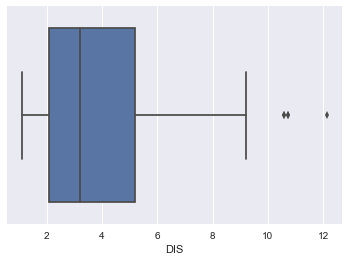

In [30]:
sns.boxplot(x=boston_df['DIS'])

In [31]:
Q1 = boston_df.quantile(0.25)
Q3 = boston_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)


CRIM         3.565378
ZN          12.500000
INDUS       12.910000
CHAS         0.000000
NOX          0.175000
RM           0.738000
AGE         49.050000
DIS          3.088250
RAD         20.000000
TAX        387.000000
PTRATIO      2.800000
B           20.847500
LSTAT       10.005000
dtype: float64


In [32]:
print(boston_df.shape)
boston_df_out = boston_df[~((boston_df < (Q1 - 1.5 * IQR)) |(boston_df > (Q3 + 1.5 * IQR))).any(axis=1)]
boston_df_out.shape

(506, 13)


(274, 13)